In [1]:
import numpy as np
import src.util as util
from src.linear_model import LinearModel


## (a)

Since $y$ and $x$ are conditionally independent on $t$, we can deduct:

$$p(y| t, x) = p(y | t) = p(y,x | t) = p(x|t)p(y|t)$$

we can find $p(t|x)$ first, with Bayes' rule and $p(t | y) = 1$:

$$\begin{align}
p(x|t)p(y|t) &= \frac{p(t|x)p(x)}{p(t)} \frac{p(t|y) p(y)}{p(t)} \\
&= \frac{p(t|x)p(x) p(t|y) p(y)}{p^2(t)} \\
&= \frac{p(t|x)p(x) p(y)}{p^2(t)}
\end{align}$$

Then for $p(y,x | t)$ use Bayes , conditional probability rule:

$$\begin{align}
p(y,x | t) &= \frac{p(t | y , x) p(y, x)}{p(t)} \\
&=  \frac{p(t | y , x) p(y | x) p(x)}{p(t)}
\end{align}$$

Then build equation based on $p(y,x | t) = p(x|t)p(y|t)$:

$$\begin{align}
\frac{p(t | y , x) p(y | x) p(x)}{p(t)} &= \frac{p(t|x)p(x) p(y)}{p^2(t)} \\
\Rightarrow p(t|x) p(x) p(y) &= \frac{p(t | y,x) p(y|x) p(x) p^2(t)}{p(t)} \\
\Rightarrow p(t|x) p(x) p(y) &= p(t | y,x) p(y|x) p(x) p(t) \\
\Rightarrow p(t|x) &= \frac{p(t | y,x) p(y|x) p(t)}{p(y)} \\
&= p(t|x) = \frac{p(t | y,x) p(t)}{p(y)} p(y|x)
\end{align}$$

Let $\alpha = \frac{p(y)}{p(t | y,x) p(t)}$ , then $p(t|x) = \frac{1}{\alpha} p(y|x).$

---

## (b)

Since $h(x^{(i)}) \approx p(y^{(i)} =1 | x^{(i)})$ and $p(t|x) \approx 1$:

$$\begin{align}
p(t|x) = \frac{1}{\alpha} p(y^{(i)} = 1|x^{(i)}) \\
\Rightarrow 1 \approx \frac{1}{\alpha} p(y^{(i)} =1|x^{(i)}) \\
\Rightarrow \alpha \approx  p(y^{(i)} =1|x^{(i)}) \approx h(x^{(i)})
\end{align}$$


---

In [2]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        if self.theta == None:
            self.theta = np.zeros(n)

        def g(z):
            return 1 / (1 + np.exp(-z))

        while True:
            theta_old = self.theta
            theta_x = x @ theta_old
            cost = -1 / m * y @ np.log(g(theta_x)) + (1 - y) @ np.log(1 - g(theta_x))
            if self.verbose:
                print("cost: ", cost)
            grad = (1 / m) * (g(theta_x) - y) @ x
            H = (1 / m) * g(theta_x) @ (1 - g(theta_x)) * x.T @ x
            H_inv = np.linalg.inv(H)

            self.theta = self.theta - H_inv @ grad
            if np.linalg.norm(self.theta - theta_old, 1) < self.eps:
                break

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        def g(z):
            return 1 / (1 + np.exp(-z))

        prob = g(x @ self.theta)
        return prob > 0.5
        # *** END CODE HERE ***


## (c) Ideal condition: got all ground truth label

In [3]:
def prob_c(train_path, valid_path, test_path, pred_path=""):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    # *** START CODE HERE ***
    # Part (c): Train and test on true labels
    # Make sure to save outputs to pred_path_c
    train_x , train_y = util.load_dataset(train_path,label_col='t', add_intercept=True)
    valid_x , valid_y = util.load_dataset(valid_path,label_col='t', add_intercept=True)
    train_x = np.delete(train_x, 2, axis=1)
    valid_x = np.delete(valid_x, 2, axis=1)

    model = LogisticRegression(verbose=False)
    model.fit(train_x, train_y)
    preds = model.predict(valid_x)
    util.calculate_metrics(valid_y,preds)
    # *** END CODER HERE

prob_c("./data/ds3_train.csv","./data/ds3_valid.csv","./data/ds3_test.csv")

Accuracy: 0.935
Precision: 0.909
Recall: 0.968
F1 Score: 0.937


## (d) Only get `y` label(partial)  

In [4]:
def prob_d(train_path, valid_path, test_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """

    # *** START CODE HERE ***
    # Part (d): Train on y-labels and test on true labels
    # Make sure to save outputs to pred_path_d
    train_x , train_y = util.load_dataset(train_path,label_col='y', add_intercept=True)
    valid_x , valid_y = util.load_dataset(valid_path,label_col='t', add_intercept=True)
    train_x = np.delete(train_x, 0, axis=1)
    valid_x = np.delete(valid_x, 2, axis=1)

    model = LogisticRegression(verbose=False)
    model.fit(train_x, train_y)
    preds = model.predict(valid_x)
    util.calculate_metrics(valid_y,preds)

    # *** END CODER HERE

prob_d("./data/ds3_train.csv","./data/ds3_valid.csv","./data/ds3_test.csv")

Accuracy: 0.500
Precision: 0.500
Recall: 1.000
F1 Score: 0.667


## (e) Calculate $\alpha$ and rescale the prediction


$$
\alpha \approx  p(y^{(i)} =1|x^{(i)}) \approx h(x^{(i)})
$$

since $p(t^{(i)}=1 | x^{(i)}) = 0.5$ 

$$
p(t^{(i)}=1|x^{(i)}) = \frac{1}{\alpha} p(y^{(i)}=1|x^{(i)}) = 0.5 = \frac{1}{\alpha} h(x^{(i)})
$$

solve for $\theta$ where the place to rescale the predictor :

$$\begin{align}
2 &= \alpha (1 + \exp(-\theta x)) \\
&\Rightarrow \frac{2}{\alpha} - 1 = \exp(-\theta x) \\
&\Rightarrow \ln(\frac{2}{\alpha} - 1) = -\theta x \\
&\Rightarrow  \theta x = -\ln(\frac{2}{\alpha} - 1)
\end{align}$$

Since `theta[0]` is all 1s, we can give some weight of threshold to it.

c: train with t(full)


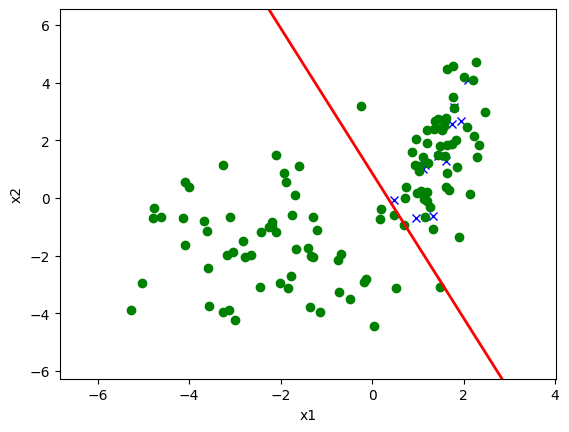

d: train with y(partial)


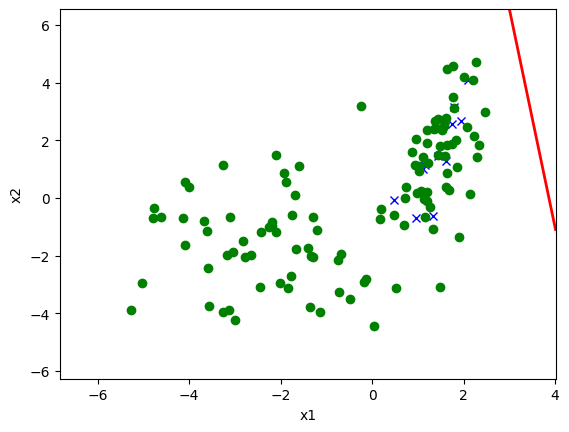

e: train with y(partial) but aurgumented with alpha


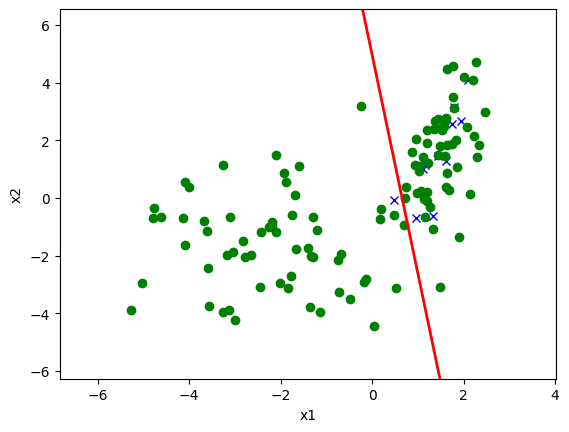

In [44]:
from matplotlib import pyplot as plt


def prob_e(train_path, valid_path, test_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """

    # *** START CODE HERE ***
    # Part (e): Apply correction factor using validation set and test on true labels
    # Plot and use np.savetxt to save outputs to pred_path_e
    
    valid_x , valid_y = util.load_dataset(valid_path,label_col='t', add_intercept=True)
    test_x, test_y =util.load_dataset(valid_path,label_col='y', add_intercept=True)

    print("c: train with t(full)")
    train_x , train_y = util.load_dataset(train_path,label_col='t',add_intercept=True)
    model = LogisticRegression(verbose=False)
    model.fit(train_x, train_y)
    util.plot(test_x, test_y, model.theta)
    plt.show()

    print("d: train with y(partial)")
    train_x , train_y = util.load_dataset(train_path,label_col='y',add_intercept=True)
    model = LogisticRegression(verbose=False)
    model.fit(train_x, train_y)
    util.plot(test_x, test_y, model.theta)
    plt.show()

    print("e: train with y(partial) but aurgumented with alpha")
    # Follow the given formula calculate alpha
    theta = model.theta
    X = test_x[test_y==1]
    a = np.mean(1/(1+np.exp(-X @ theta)))
    # rescale theta
    theta[0] = theta[0] + np.log(2/a - 1)
    util.plot(test_x, test_y,theta)
    plt.show()
    # *** END CODER HERE

prob_e("./data/ds3_train.csv","./data/ds3_valid.csv","./data/ds3_test.csv")